In [ ]:
----LOGISTIC REGRESSION-------
#Output variable -> y
#y -> Whether the client has subscribed a term deposit or not 
#Binomial ("yes" or "no")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("E:\\Excelr\\Assignments\\Assignments DS\\Logistic Regression\\bank-full.csv", delimiter=';')

In [3]:
data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
#changing the values of yes =1 and no =0
data['y'] = (data['y']=='yes').astype(int)
data['marital'] = (data['marital']=='single').astype(int)
data['default'] = (data['default']=='yes').astype(int)
data['housing'] = (data['housing']=='yes').astype(int)
data['loan'] = (data['loan']=='yes').astype(int)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,0,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,1,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,0,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,0,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,1,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [7]:
def month_converter(mnth):
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    return months.index(mnth) + 1
data['month'] = data['month'].apply(lambda x: month_converter(x))

In [8]:
data.job.value_counts()
data.job.unique() 


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [9]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data.job = label_encoder.fit_transform(data.job) 
data.job.unique() 
data.education = label_encoder.fit_transform(data.education) 
data.education.unique() 
data.contact = label_encoder.fit_transform(data.contact) 
data.contact.unique() 
data.poutcome = label_encoder.fit_transform(data.poutcome) 
data.poutcome.unique() 

data.education.value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

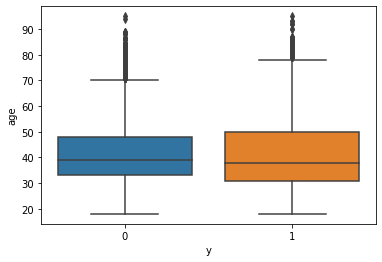

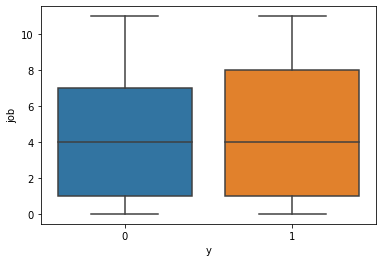

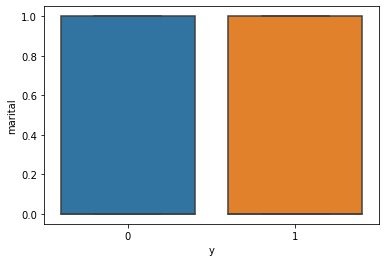

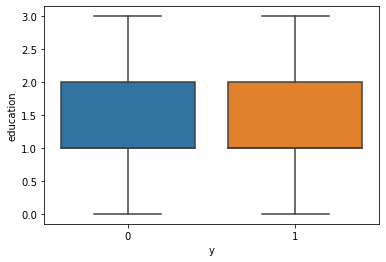

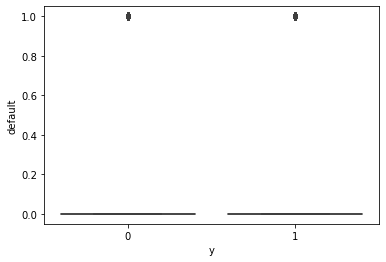

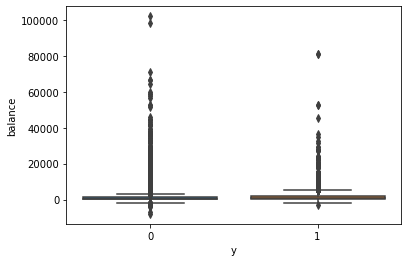

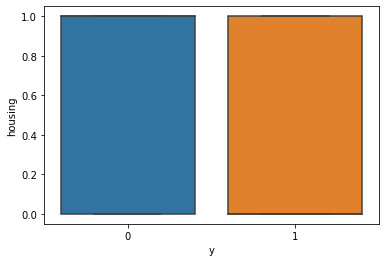

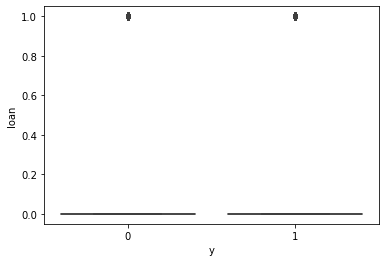

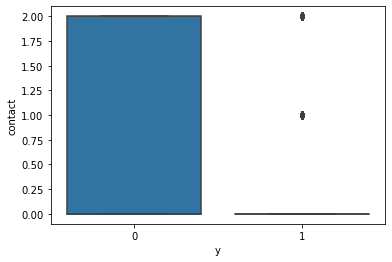

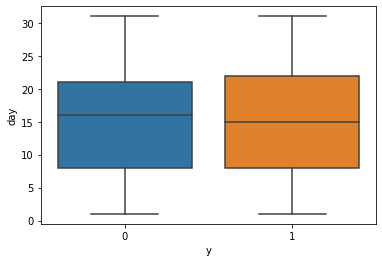

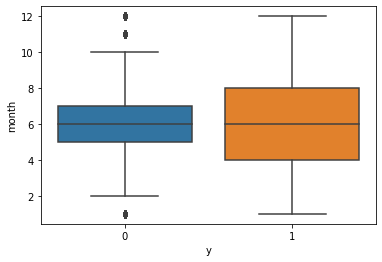

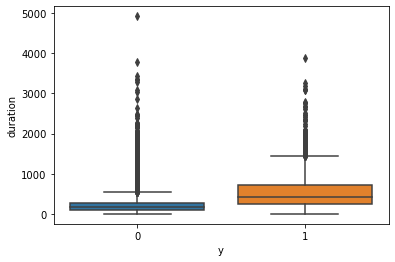

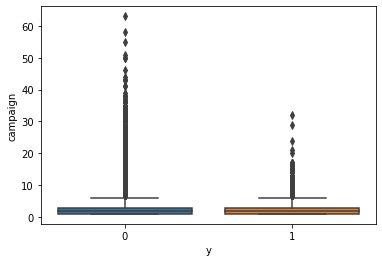

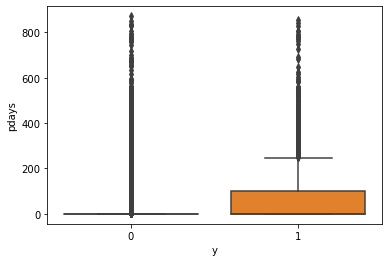

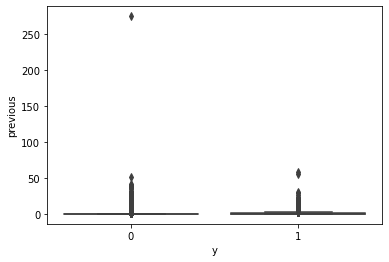

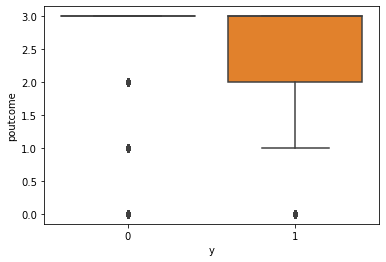

In [10]:
sns.boxplot(x="y",y="age",data=data)
plt.show()
sns.boxplot(x="y",y="job",data=data)
plt.show()
sns.boxplot(x="y",y="marital",data=data)
plt.show()
sns.boxplot(x="y",y="education",data=data)
plt.show()
sns.boxplot(x="y",y="default",data=data)
plt.show()
sns.boxplot(x="y",y="balance",data=data)
plt.show()
sns.boxplot(x="y",y="housing",data=data)
plt.show()
sns.boxplot(x="y",y="loan",data=data)
plt.show()
sns.boxplot(x="y",y="contact",data=data)
plt.show()
sns.boxplot(x="y",y="day",data=data)
plt.show()
sns.boxplot(x="y",y="month",data=data)
plt.show()
sns.boxplot(x="y",y="duration",data=data)
plt.show()
sns.boxplot(x="y",y="campaign",data=data)
plt.show()
sns.boxplot(x="y",y="pdays",data=data)
plt.show()
sns.boxplot(x="y",y="previous",data=data)
plt.show()
sns.boxplot(x="y",y="poutcome",data=data)
plt.show()

In [11]:
#Model Building
import statsmodels.formula.api as sm
model = sm.logit('y~age+job+marital+education+default+balance+housing+loan+contact+day+month+duration+campaign+pdays+previous+poutcome', data = data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.267303
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45194
Method:                           MLE   Df Model:                           16
Date:                Wed, 15 Jul 2020   Pseudo R-squ.:                  0.2593
Time:                        23:56:24   Log-Likelihood:                -12085.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7867      0.139    -27.279      0.000      -4.059      -3.515
age            0.0111      0.002      6.505      0.000       0.008       0.014
job            0.0056      0.005      1.048      0.295      -0.005       0.016
marital        0.4172      0.041     10.138      0.000       0.337       0.498
education      0.1916      0.023      8.292      0.000       0.146       0.237
default       -0.3643      0.161     -2.269      0.023      -0.679      -0.050
balance     2.019e-05   4.54e-06      4.447      0.000    1.13e-05    2.91e-05
housing       -0.9963      0.038    -26.331      0.000      -1.070      -0.922
loan          -0.6848      0.057    -12.005      0.000      -0.797      -0.573
contact       -0.6035      0.026    -22.852      0.000      -0.655      -0.552
day           -0.0046      0.002     -2.223      0.026      -0.009      -0.001
month         -0.0073      0.006     -1.125      0.261      -0.020       0.005
duration       0.0039    6.1e-05     64.613      0.000       0.004       0.004
campaign      -0.1368      0.010    -13.648      0.000      -0.156      -0.117
pdays          0.0036      0.000     14.042      0.000       0.003       0.004
previous       0.0908      0.008     11.282      0.000       0.075       0.107
poutcome       0.2199      0.029      7.523      0.000       0.163       0.277
==============================================================================
"""

In [13]:
#predicting the values
y_pred = model.predict(data)
y_pred

0        0.032004
1        0.022162
2        0.004742
3        0.017367
4        0.088390
           ...   
45206    0.762827
45207    0.286056
45208    0.910771
45209    0.168793
45210    0.443971
Length: 45211, dtype: float64

ERROR! Session/line number was not unique in database. History logging moved to new session 186


In [14]:
# Creating new column for storing predicted values
data['pred_subscribed'] = y_pred

In [16]:
# filling all the cells with zeroes
data["Att_val"] = 0

In [17]:

# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
data.loc[y_pred>=0.5,"Att_val"] = 1
data.Att_val

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    0
45208    1
45209    0
45210    0
Name: Att_val, Length: 45211, dtype: int64

In [18]:
from sklearn.metrics import classification_report
classification_report(data.Att_val,data.y)

'              precision    recall  f1-score   support\n\n           0       0.98      0.90      0.94     43281\n           1       0.22      0.60      0.32      1930\n\n    accuracy                           0.89     45211\n   macro avg       0.60      0.75      0.63     45211\nweighted avg       0.95      0.89      0.91     45211\n'

In [19]:
# confusion matrix 
confusion_matrix = pd.crosstab(data['y'],data.Att_val)
confusion_matrix


Att_val,0,1
y,,
0,39147,775
1,4134,1155


In [20]:
accuracy = (39147+1155)/(39147+775+4134+1155) # 70.14
accuracy #0.8914

0.891420229590144

In [21]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(data.y, y_pred)

Text(0, 0.5, 'True Positive')

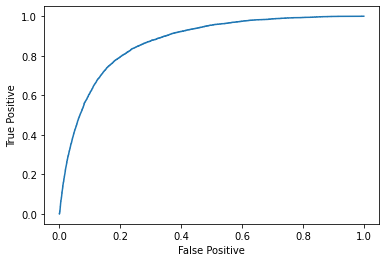

In [22]:
plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")

In [23]:
roc_auc = metrics.auc(fpr, tpr) 
roc_auc #0.87188

0.8718887631600092